**Customer Churn**

In [175]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [176]:
dataset = pd.read_csv("../dataset/dataset.csv")

In [177]:
dataset = dataset.drop(columns='customerID')

In [178]:
dataset_columns = dataset.columns.tolist()
for column in dataset_columns:
    print(f"{column} unique values : {dataset[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

In [179]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [180]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors="coerce")

In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [182]:
dataset["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [183]:
dataset["PaymentMethod"] = dataset["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [184]:
dataset["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [185]:
dataset.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [186]:
value_na = [value for value in dataset.columns if dataset[value].isnull().sum() > 1]

In [187]:
dataset = dataset.rename(columns={"SeniorCitizen": "Senior Citizen", 
                                  "tenure": "Tenure", 
                                  "gender": "Gender",
                                  "PhoneService": "Phone Service",
                                  "MultipleLines": "Multiple Lines",
                                  "InternetService": "Internet Service",
                                  "OnlineSecurity": "Online Security",
                                  "OnlineBackup": "Online Backup",
                                  "DeviceProtection": "Device Protection",
                                  "TechSupport": "Tech Support",
                                  "StreamingTV": "Streaming TV",
                                  "StreamingMovies": "Streaming Movies",
                                  "PaperlessBilling": "Paperless Billing",
                                  "PaymentMethod": "Payment Method",
                                  "MonthlyCharges": "Monthly Charges",
                                  "TotalCharges": "Total Charges"})

In [188]:
dataset.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [189]:
dataset.dropna(inplace=True)

In [190]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7032 non-null   object 
 1   Senior Citizen     7032 non-null   int64  
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   Tenure             7032 non-null   int64  
 5   Phone Service      7032 non-null   object 
 6   Multiple Lines     7032 non-null   object 
 7   Internet Service   7032 non-null   object 
 8   Online Security    7032 non-null   object 
 9   Online Backup      7032 non-null   object 
 10  Device Protection  7032 non-null   object 
 11  Tech Support       7032 non-null   object 
 12  Streaming TV       7032 non-null   object 
 13  Streaming Movies   7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  Paperless Billing  7032 non-null   object 
 16  Payment Method     7032 non-n

In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7032 non-null   object 
 1   Senior Citizen     7032 non-null   int64  
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   Tenure             7032 non-null   int64  
 5   Phone Service      7032 non-null   object 
 6   Multiple Lines     7032 non-null   object 
 7   Internet Service   7032 non-null   object 
 8   Online Security    7032 non-null   object 
 9   Online Backup      7032 non-null   object 
 10  Device Protection  7032 non-null   object 
 11  Tech Support       7032 non-null   object 
 12  Streaming TV       7032 non-null   object 
 13  Streaming Movies   7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  Paperless Billing  7032 non-null   object 
 16  Payment Method     7032 non-n

In [192]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

<Axes: xlabel='Churn', ylabel='count'>

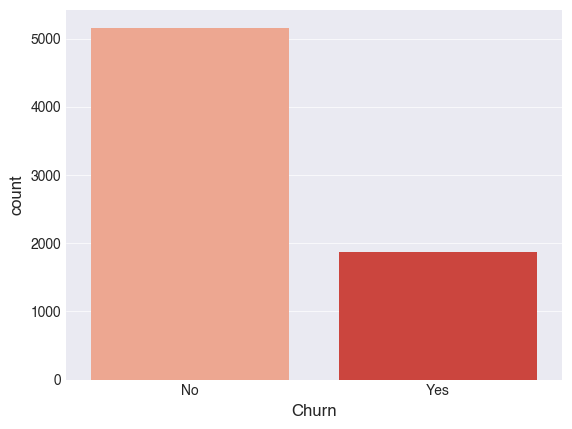

In [193]:
plt.figure()
sns.countplot(x = dataset["Churn"],palette="Reds", hue=dataset["Churn"], legend=False)
#plt.savefig("../Graphs/Churn Count")

In [194]:
#Make a function to plot categorical data according to target
def plot_categorical_to_target(dataset,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = dataset, hue = target)
    return plt.show()

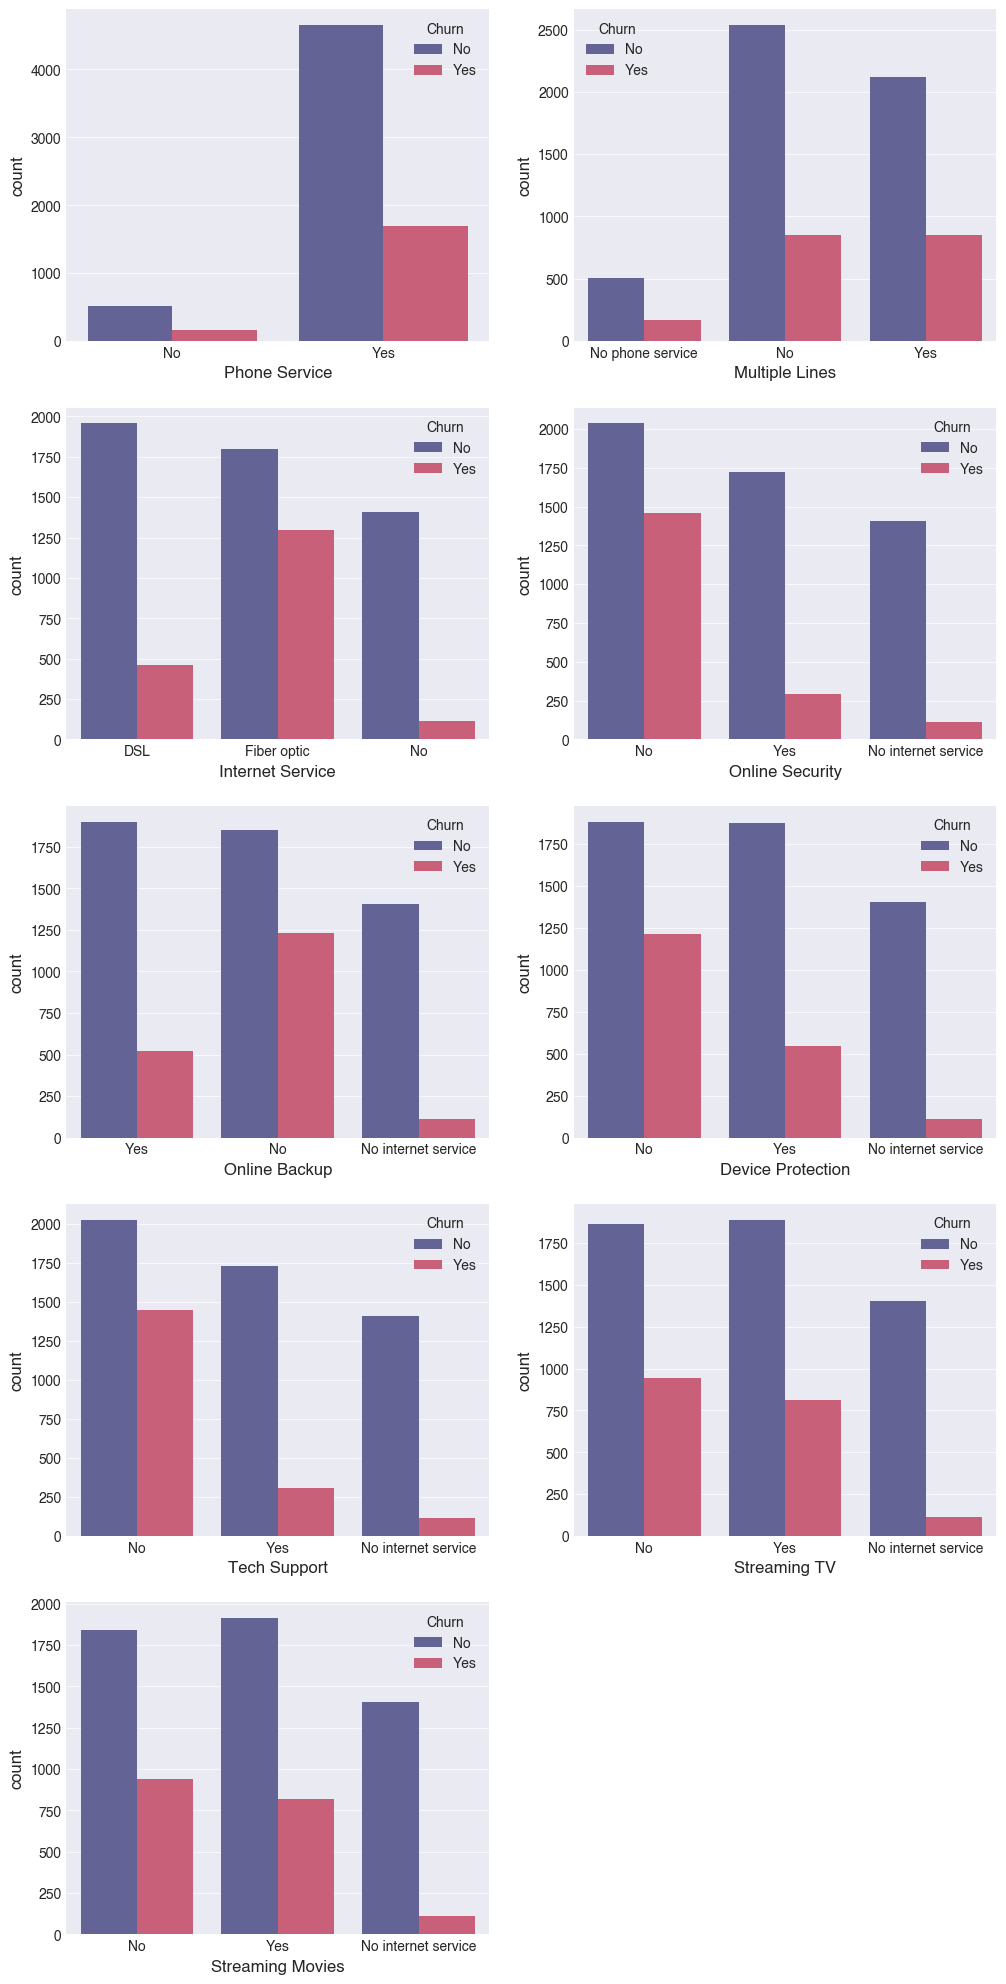

In [195]:
customer_services = ["Phone Service","Multiple Lines","Internet Service","Online Security","Online Backup",
                    "Device Protection","Tech Support","Streaming TV","Streaming Movies"]
#plt.savefig("../Graphs/Customer Service")
plot_categorical_to_target(dataset,customer_services, "Churn");

The moderately higher churn rate for customers who has the phone service.

Customers with internet service fiber optic have a higher churn rate compared with DSL and No.

The much higher churn rate for customers without online security.

Customers who don’t have access to tech support tend to leave more frequently than those who do.

Customers without online backup and device protection have a higher churn rate.

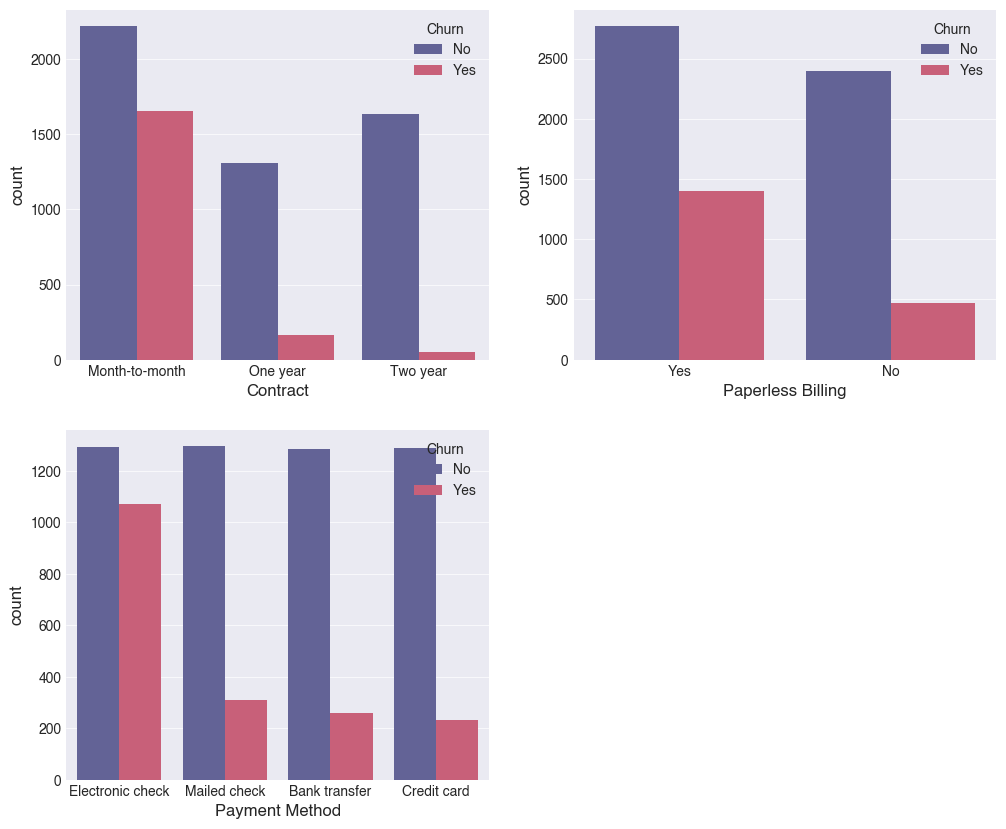

In [196]:
customer_account_cat = ["Contract","Paperless Billing","Payment Method"]
#plt.savefig("../Graphs/Contract Type")
plot_categorical_to_target(dataset,customer_account_cat,"Churn")

Month to Month Contract Users have a higher chance of churning as compared to One Year or Two Year billings.

Paperless Billing seem to have higher churing rate compared to Traditional Paper bills.

People who pay using Electronic Check have higher churning rate compared to other methods.

In [197]:
def histogram_plots(dataset, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(dataset[column][dataset[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(dataset[column][dataset[target]=="No"], fill = True)
        ax.legend(["Churn","No Churn"], loc='upper right')
    #plt.savefig("../Graphs/Charges")
    return plt.show()

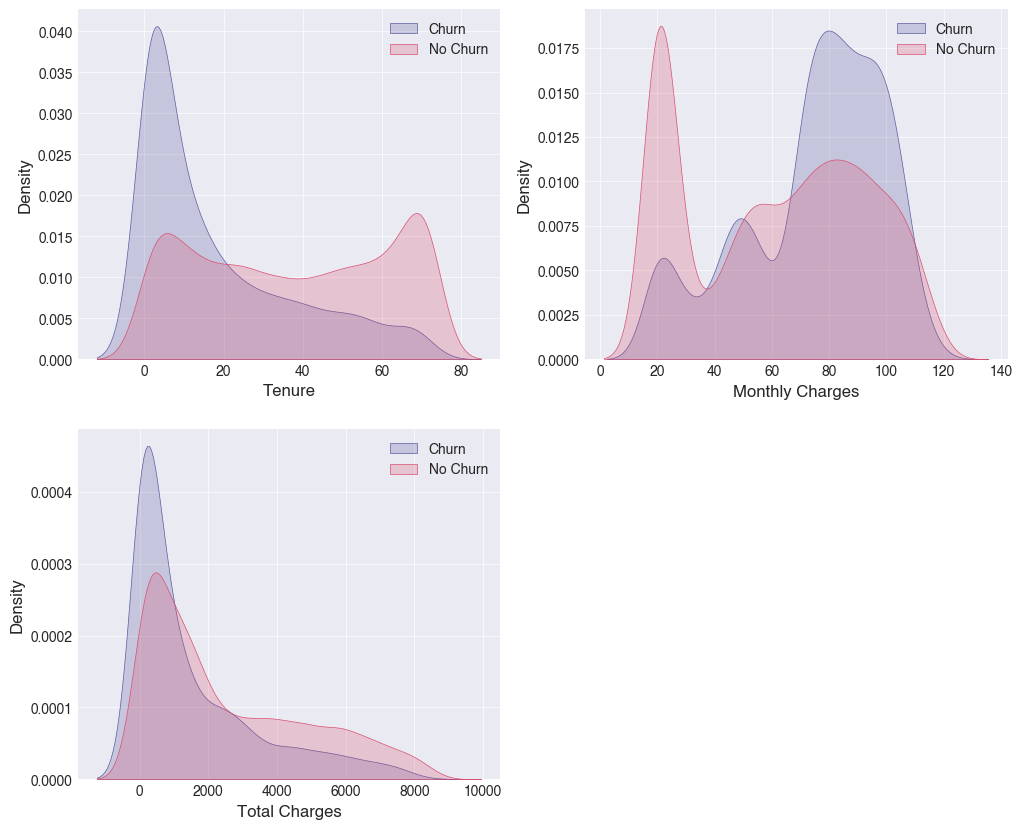

In [198]:
customer_account_num = ["Tenure", "Monthly Charges","Total Charges"]
histogram_plots(dataset,customer_account_num, "Churn")

In [199]:
def outlier_check_boxplot(dataset,numerical_values,Target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = dataset, hue=Target)
    #plt.savefig("../Graphs/Boxplot Charges")
    return plt.show()

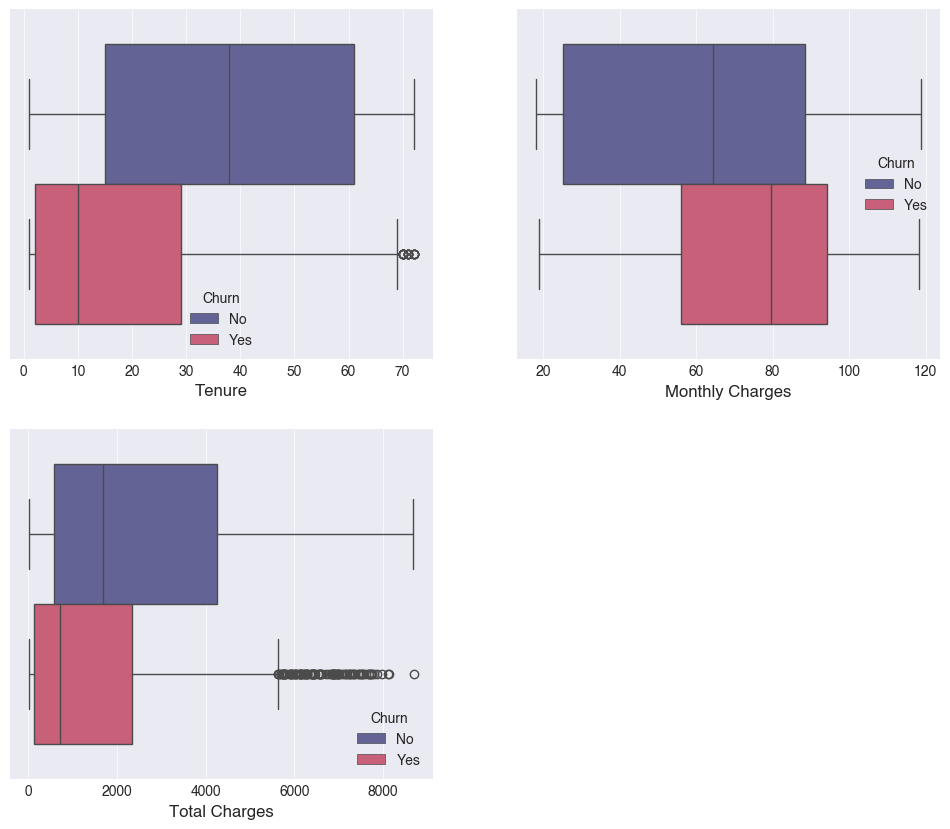

In [200]:
numerical_values = ["Tenure","Monthly Charges","Total Charges"]
outlier_check_boxplot(dataset,numerical_values,"Churn")